In [1]:
#Loading necessary libraries for the project at hand
import warnings
from collections import Counter
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import TransformerMixin #create new classes for transformations
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) #preprocessing 
from sklearn.decomposition import PCA as pca #dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA #Discriminant Analysis
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, cross_val_score,cross_val_predict, GridSearchCV, learning_curve, validation_curve) # model selection modules
from sklearn.pipeline import Pipeline # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin #create a box-cox transformation
from sklearn.naive_bayes import GaussianNB
from xgboost import (XGBClassifier, plot_importance)
from time import time
from pandasql import sqldf #SQL for data wrangling
import numpy as np  #linear algebra
import pandas as pd  #read and wrangling
import matplotlib.pyplot as plt #visualizations
import seaborn as sns #other visualizations
import transformers #tranformations
from scipy.stats import boxcox # data transform
from datetime import datetime, date
import os, json
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df
import pylab
import scipy.stats as stats
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score


%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [2]:
#Load & read JSON files...To be done [Already] in Azure FHIR loader
test_1 = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/Abby752_Kuvalis369_2b083021-e93f-4991-bf49-fd4f20060ef8.json?raw=true' 
new = pd.read_json(test_1)
print(new.to_string())

    resourceType         type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [3]:
#Convert JSON files to dataframes
pd.DataFrame.from_dict(new)

,resourceType,type,entry
0,Bundle,transaction,{'fullUrl': 'urn:uuid:31191928-6acb-4d73-931c-...
1,Bundle,transaction,{'fullUrl': 'urn:uuid:a75a4008-fd5b-3248-ba76-...
2,Bundle,transaction,{'fullUrl': 'urn:uuid:0000016d-3a85-4cca-0000-...
3,Bundle,transaction,{'fullUrl': 'urn:uuid:fabc78b8-5236-4876-9b21-...
4,Bundle,transaction,{'fullUrl': 'urn:uuid:c5d93772-43ff-41ec-94a3-...
...,...,...,...
178,Bundle,transaction,{'fullUrl': 'urn:uuid:04ba6e4e-ff66-41ef-9d2d-...
179,Bundle,transaction,{'fullUrl': 'urn:uuid:1045a056-60cd-4f6d-a318-...
180,Bundle,transaction,{'fullUrl': 'urn:uuid:265b0238-5238-42a4-a8ea-...
181,Bundle,transaction,{'fullUrl': 'urn:uuid:9f82d16b-f353-483a-8a3b-...


In [4]:
#Load Synthea & MS_DRG Datasets
allergies = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/allergies.csv?raw=true'
careplans = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/careplans.csv?raw=true'
conditions = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/conditions.csv?raw=true'
devices = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/devices.csv?raw=true'
encounters = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/encounters.csv?raw=true'
imaging_studies = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/imaging_studies.csv?raw=true'
immunizations = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/immunizations.csv?raw=true'
medications = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/medications.csv?raw=true'
observations = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/observations_adjusted.csv?raw=true'
organizations = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/organizations.csv?raw=true'
patients = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/patients.csv?raw=true'
payer_transitions = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/payer_transitions.csv?raw=true'
payers = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/payers.csv?raw=true'
procedures = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/procedures.csv?raw=true'
providers = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/providers.csv?raw=true'
supplies = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/supplies.csv?raw=true'
msdrg = 'https://github.com/olajideajayi/Synthea-and-Other-Datasets/blob/main/msdrg_v39.csv?raw=true'
#Read Datasets
allergies = pd.read_csv(allergies,index_col=0)
careplans = pd.read_csv(careplans,index_col=0)
conditions = pd.read_csv(conditions,index_col=0)
devices = pd.read_csv(devices,index_col=0)
encounters = pd.read_csv(encounters,index_col=0)
imaging_studies = pd.read_csv(imaging_studies,index_col=0)
immunizations = pd.read_csv(immunizations,index_col=0)
medications = pd.read_csv(medications,index_col=0)
observations = pd.read_csv(observations,index_col=0)
organizations = pd.read_csv(organizations,index_col=0)
patients = pd.read_csv(patients,index_col=0)
payer_transitions = pd.read_csv(payer_transitions,index_col=0)
payers = pd.read_csv(payers,index_col=0)
procedures = pd.read_csv(procedures,index_col=0)
providers = pd.read_csv(providers,index_col=0)
supplies = pd.read_csv(supplies,index_col=0)
msdrg = pd.read_csv(msdrg,index_col=0)

In [5]:
#Sample data - patients
patients.head(5)

,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
Id,,,,,,,,,,,,,,,,,,,,,
1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,271227.08,1334.88
034e9e3b-2def-4559-bb2a-7850888ae060,1983-11-14,NaN,999-73-5361,S99962402,X88275464X,Mr.,Milo271,Feil794,NaN,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793946.01,3204.49
10339b10-3cd1-4ac3-ac13-ec26728cb592,1992-06-02,NaN,999-27-3385,S99972682,X73754411X,Mr.,Jayson808,Fadel536,NaN,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,574111.90,2606.40
8d4c4326-e9de-4f45-9a4c-f8c36bff89ae,1978-05-27,NaN,999-85-4926,S99974448,X40915583X,Mrs.,Mariana775,Rutherford999,NaN,Williamson769,...,Yarmouth Massachusetts US,999 Kuhn Forge,Lowell,Massachusetts,Middlesex County,1851.0,42.636143,-71.343255,935630.30,8756.19
f5dcd418-09fe-4a2f-baa0-3da800bd8c3a,1996-10-18,NaN,999-60-7372,S99915787,X86772962X,Mr.,Gregorio366,Auer97,NaN,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,598763.07,3772.20


In [6]:
#Data types - patients
patients.dtypes

BIRTHDATE               object
DEATHDATE               object
SSN                     object
DRIVERS                 object
PASSPORT                object
PREFIX                  object
FIRST                   object
LAST                    object
SUFFIX                  object
MAIDEN                  object
MARITAL                 object
RACE                    object
ETHNICITY               object
GENDER                  object
BIRTHPLACE              object
ADDRESS                 object
CITY                    object
STATE                   object
COUNTY                  object
ZIP                    float64
LAT                    float64
LON                    float64
HEALTHCARE_EXPENSES    float64
HEALTHCARE_COVERAGE    float64
dtype: object

In [7]:
#Data Summary - patients
patients.describe()

,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
count,628.000000,1171.000000,1171.000000,1.171000e+03,1171.000000
mean,2009.644904,42.256374,-71.359813,7.649409e+05,12932.737481
std,451.871476,0.288803,0.629792,5.464749e+05,43882.481019
min,1001.000000,41.338109,-73.382050,1.822160e+03,0.000000
25%,1832.000000,42.115956,-71.580540,2.335516e+05,3101.020000
50%,2119.000000,42.304617,-71.152164,7.186791e+05,5741.800000
75%,2190.000000,42.448341,-71.019246,1.260844e+06,10569.075000
max,2861.000000,42.895846,-69.940763,2.145924e+06,927873.530000


In [8]:
#Select Specific Data Elements from Patients, Encounters and Conditions 
#Data wrangling from Patients, Encounters and Conditions merged dataframes
a="""select x.Id as ENCOUNTER_ID, x.PATIENT as PATIENT_ID,x.START,x.STOP,x.ENCOUNTERCLASS,y.BIRTHDATE,y.DEATHDATE,y.MARITAL,y.RACE,y.ETHNICITY,y.GENDER,z.DESCRIPTION from encounters x 
left join patients y on x.PATIENT=y.Id
left join conditions z on x.Id=z.ENCOUNTER;"""
pysqldf = lambda a: sqldf(a, globals())
pat_enc_con = pysqldf(a)

In [9]:
#Select Specific Data Elements from Patients, Encounters and Conditions 
#Data wrangling from Patients, Encounters and Conditions merged dataframes
a="""select x.Id as ENCOUNTER_ID, x.PATIENT as PATIENT_ID,x.START,x.STOP,x.ENCOUNTERCLASS,y.BIRTHDATE,y.DEATHDATE,y.MARITAL,y.RACE,y.ETHNICITY,y.GENDER,z.DESCRIPTION from encounters x 
left join patients y on x.PATIENT=y.Id
left join conditions z on x.Id=z.ENCOUNTER;"""
pysqldf = lambda a: sqldf(a, globals())
pat_enc_con = pysqldf(a)

In [10]:
#Data wrangling from Observations
b="""select distinct ENCOUNTER as ENCOUNTER_ID,DESCRIPTION as ENC_DESCRIPTION,VALUE from observations;"""
pysqldf = lambda b: sqldf(b, globals())
obs = pysqldf(b)

In [11]:
#Pivot table to align with prior datasets - Interested in numerical data for this specific work
new_obs = pd.pivot_table(obs, index = 'ENCOUNTER_ID', columns = 'ENC_DESCRIPTION', values = 'VALUE', aggfunc = 'sum')

In [12]:
#Merge Observations, Patients, Encounters and Conditions Data
c="""select x.*,y.PATIENT_ID,y.START,y.STOP,y.ENCOUNTERCLASS,y.BIRTHDATE,y.DEATHDATE,y.MARITAL,y.RACE,y.ETHNICITY,y.GENDER,y.DESCRIPTION from new_obs x 
left join pat_enc_con y on x.ENCOUNTER_ID=y.ENCOUNTER_ID;"""
pysqldf = lambda c: sqldf(c, globals())
obs_pat_enc_con = pysqldf(c)

In [13]:
#Merge obs_pat_enc_con with MS-DRG data
d="""select x.*, y.MSDRGDESCRIPTION,y.MSDRG from obs_pat_enc_con x
left join msdrg y on x.DESCRIPTION=y.CONDITIONDESCRIPTION
;"""
pysqldf = lambda d: sqldf(d, globals())
obs_pat_enc_con_drg = pysqldf(d)

In [14]:
#DRG populated rows only and exclude death
e="""select * from obs_pat_enc_con_drg
where DEATHDATE is null
and MSDRG is not null;"""
pysqldf = lambda e: sqldf(e, globals())
newdataframe = pysqldf(e)

In [15]:
#More Data wrangling...
def from_dob_to_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [16]:
#Date conversion
newdataframe['Dob'] = pd.to_datetime(newdataframe.BIRTHDATE)
newdataframe['Age_Years'] = newdataframe['Dob'].apply(lambda x: from_dob_to_age(x))
newdataframe['Adm_Date'] = pd.to_datetime(newdataframe.START)
newdataframe['Dis_Date'] = pd.to_datetime(newdataframe.STOP)
newdataframe['LOS'] = newdataframe['Dis_Date'] - newdataframe['Adm_Date']
newdataframe['LOS'] = newdataframe['LOS']/np.timedelta64(1,'D')

In [17]:
#Relevant fields with sizable data
f="""select ENCOUNTERCLASS,
MARITAL,RACE,ETHNICITY,GENDER,Age_Years,(LOS*24) as LOS_Hours,
Painseverity0to10verbalnumericratingScore_Reported_score,
BodyHeight_cm,
BodyWeight_kg,
DiastolicBloodPressure_mmHg,
Heartrate_permin,
Respiratoryrate_permin,
SystolicBloodPressure_mmHg,
Bodytemperature_Cel,
BodyMassIndex_kgperm2,MSDRGDESCRIPTION,MSDRG from newdataframe;"""
pysqldf = lambda f: sqldf(f, globals())
Relevant_df = pysqldf(f)

In [18]:
Relevant_df['ENCOUNTERCLASS'].value_counts()

ambulatory    959
wellness      386
emergency      47
inpatient      43
outpatient     30
Name: ENCOUNTERCLASS, dtype: int64

In [19]:
Relevant_df['RACE'].value_counts()

white     1202
asian      128
black      123
native       8
other        4
Name: RACE, dtype: int64

In [20]:
Relevant_df['MARITAL'].value_counts()

M    816
S    207
Name: MARITAL, dtype: int64

In [21]:
Relevant_df['ETHNICITY'].value_counts()

nonhispanic    1335
hispanic        130
Name: ETHNICITY, dtype: int64

In [22]:
Relevant_df['GENDER'].value_counts()

F    813
M    652
Name: GENDER, dtype: int64

In [23]:
Relevant_df['Age_Years'].describe()

count    1465.000000
mean       43.709898
std        22.298700
min         2.000000
25%        24.000000
50%        44.000000
75%        59.000000
max       111.000000
Name: Age_Years, dtype: float64

In [24]:
Relevant_df['LOS_Hours'].describe()

count    1465.000000
mean        3.063857
std        53.236193
min         0.250000
25%         0.250000
50%         0.250000
75%         0.500000
max      1780.133333
Name: LOS_Hours, dtype: float64

In [25]:
#Relevant fields with for modeling
g="""select Age_Years,LOS_Hours,
Painseverity0to10verbalnumericratingScore_Reported_score,
BodyHeight_cm,
BodyWeight_kg,
DiastolicBloodPressure_mmHg,
Heartrate_permin,
Respiratoryrate_permin,
SystolicBloodPressure_mmHg,
Bodytemperature_Cel,
BodyMassIndex_kgperm2,MSDRG from Relevant_df;"""
pysqldf = lambda g: sqldf(g, globals())
model_df = pysqldf(g)

In [26]:
#Change MSDRG to String
#Using dictionary to convert
convert_dict = {'MSDRG': int}
model_df = model_df.astype(convert_dict)
print(model_df.dtypes)

Age_Years                                                     int64
LOS_Hours                                                   float64
Painseverity0to10verbalnumericratingScore_Reported_score    float64
BodyHeight_cm                                               float64
BodyWeight_kg                                               float64
DiastolicBloodPressure_mmHg                                 float64
Heartrate_permin                                            float64
Respiratoryrate_permin                                      float64
SystolicBloodPressure_mmHg                                  float64
Bodytemperature_Cel                                         float64
BodyMassIndex_kgperm2                                       float64
MSDRG                                                         int32
dtype: object


In [27]:
#Change MSDRG to String
#Using dictionary to convert
convert_dict = {'MSDRG': str}
model_df = model_df.astype(convert_dict)
print(model_df.dtypes)

Age_Years                                                     int64
LOS_Hours                                                   float64
Painseverity0to10verbalnumericratingScore_Reported_score    float64
BodyHeight_cm                                               float64
BodyWeight_kg                                               float64
DiastolicBloodPressure_mmHg                                 float64
Heartrate_permin                                            float64
Respiratoryrate_permin                                      float64
SystolicBloodPressure_mmHg                                  float64
Bodytemperature_Cel                                         float64
BodyMassIndex_kgperm2                                       float64
MSDRG                                                        object
dtype: object


In [28]:
#Length
model_df['MSDRGLen'] = model_df['MSDRG'].astype(str).map(len)

In [29]:
#DRG recoded
h="""select Age_Years,LOS_Hours,
Painseverity0to10verbalnumericratingScore_Reported_score,
BodyHeight_cm,
BodyWeight_kg,
DiastolicBloodPressure_mmHg,
Heartrate_permin,
Respiratoryrate_permin,
SystolicBloodPressure_mmHg,
Bodytemperature_Cel,
BodyMassIndex_kgperm2,
case when MSDRGLen<3 then 0||MSDRG
     else MSDRG
end as CMSDRG
from model_df;"""
pysqldf = lambda h: sqldf(h, globals())
new_model_df = pysqldf(h)

((array([-3.30609733, -3.04895926, -2.90596672, ...,  2.90596672,
          3.04895926,  3.30609733]),
  array([50. , 51.3, 51.3, ...,  nan,  nan,  nan])),
 (nan, nan, nan))

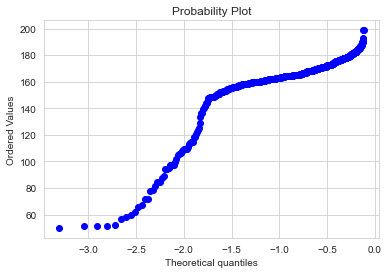

In [30]:
#Test for normality
#Age
#LOS
#Painseverity0to10verbalnumericratingScore_Reported_score
#BodyHeight_cm
#BodyWeight_kg
#DiastolicBloodPressure_mmHg
#Heartrate_permin
#Respiratoryrate_permin
#SystolicBloodPressure_mmHg
#Bodytemperature_Cel
#BodyMassIndex_kgperm2
stats.probplot(new_model_df['BodyHeight_cm'], dist="norm",plot=pylab)

In [31]:
#Replace missing with median: Non-Normal distributions
new_model_df['Age_Years'] = new_model_df['Age_Years'].fillna(new_model_df['Age_Years'].median())
new_model_df['LOS_Hours'] = new_model_df['LOS_Hours'].fillna(new_model_df['LOS_Hours'].median())
new_model_df['Painseverity0to10verbalnumericratingScore_Reported_score'] = new_model_df['Painseverity0to10verbalnumericratingScore_Reported_score'].fillna(new_model_df['Painseverity0to10verbalnumericratingScore_Reported_score'].median())
new_model_df['BodyHeight_cm'] = new_model_df['BodyHeight_cm'].fillna(new_model_df['BodyHeight_cm'].median())
new_model_df['BodyWeight_kg'] = new_model_df['BodyWeight_kg'].fillna(new_model_df['BodyWeight_kg'].median())
new_model_df['DiastolicBloodPressure_mmHg'] = new_model_df['DiastolicBloodPressure_mmHg'].fillna(new_model_df['DiastolicBloodPressure_mmHg'].median())
new_model_df['Heartrate_permin'] = new_model_df['Heartrate_permin'].fillna(new_model_df['Heartrate_permin'].median())
new_model_df['Respiratoryrate_permin'] = new_model_df['Respiratoryrate_permin'].fillna(new_model_df['Respiratoryrate_permin'].median())
new_model_df['SystolicBloodPressure_mmHg'] = new_model_df['SystolicBloodPressure_mmHg'].fillna(new_model_df['SystolicBloodPressure_mmHg'].median())
new_model_df['Bodytemperature_Cel'] = new_model_df['Bodytemperature_Cel'].fillna(new_model_df['Bodytemperature_Cel'].median())
new_model_df['BodyMassIndex_kgperm2'] = new_model_df['BodyMassIndex_kgperm2'].fillna(new_model_df['BodyMassIndex_kgperm2'].median())

In [32]:
dataframe=new_model_df
features = dataframe.columns[:-1].tolist()
print(dataframe.shape)

(1465, 12)


In [33]:
#Export to csv
dataframe.to_csv(r'C:\Users\olajideajayi\OneDrive - Microsoft\Desktop\WIP\1 ShellyA Pipeline\Tampa General Hospital\dataframe.csv', index = False)

In [34]:
#Distribution of MSDRG
dataframe['CMSDRG'].value_counts()
#The dataset is unbalanced

011    661
640    147
152    144
642     74
304     53
202     50
811     48
553     46
385     42
562     31
643     23
157     14
308     13
302     11
091     11
102     11
393     10
056      9
684      8
582      7
542      6
291      6
073      6
190      5
951      4
564      3
100      3
722      3
715      3
698      2
689      2
555      2
374      2
913      1
180      1
375      1
817      1
124      1
Name: CMSDRG, dtype: int64

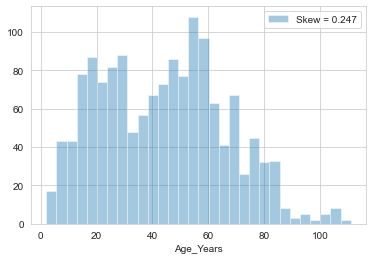

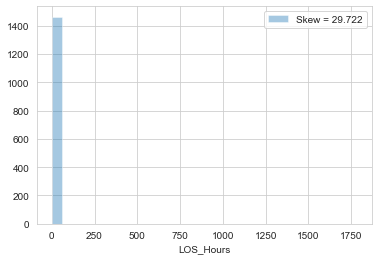

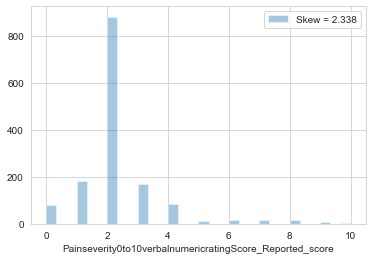

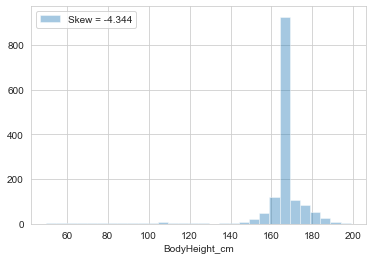

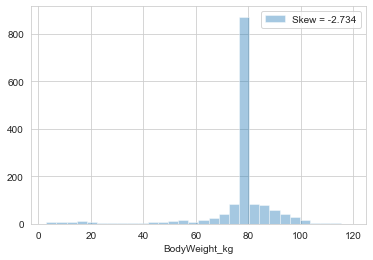

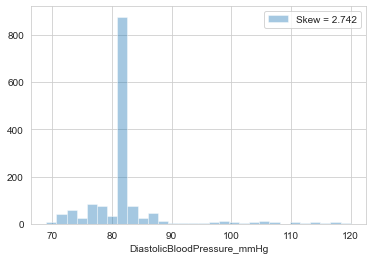

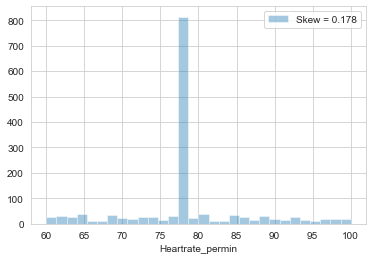

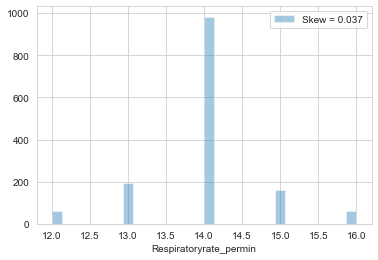

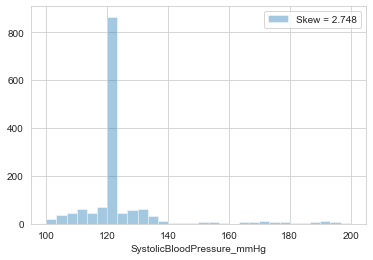

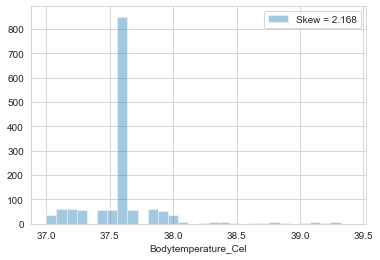

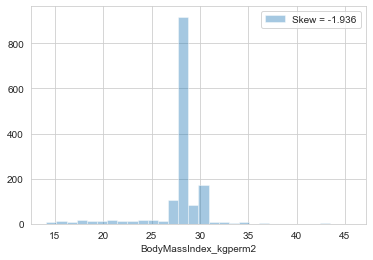

In [35]:
#Data visualization
for feat in features:
    skew = dataframe[feat].skew()
    sns.distplot(dataframe[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()
#the features are not normally distributed

In [36]:
# Detect observations with more than one outlier
#observations containing outliers using Turkey's method

def outlier_hunt(dataframe):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in dataframe.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(dataframe[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(dataframe[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(dataframe[features])))) 

The dataset contains 666 observations with more than 2 outliers


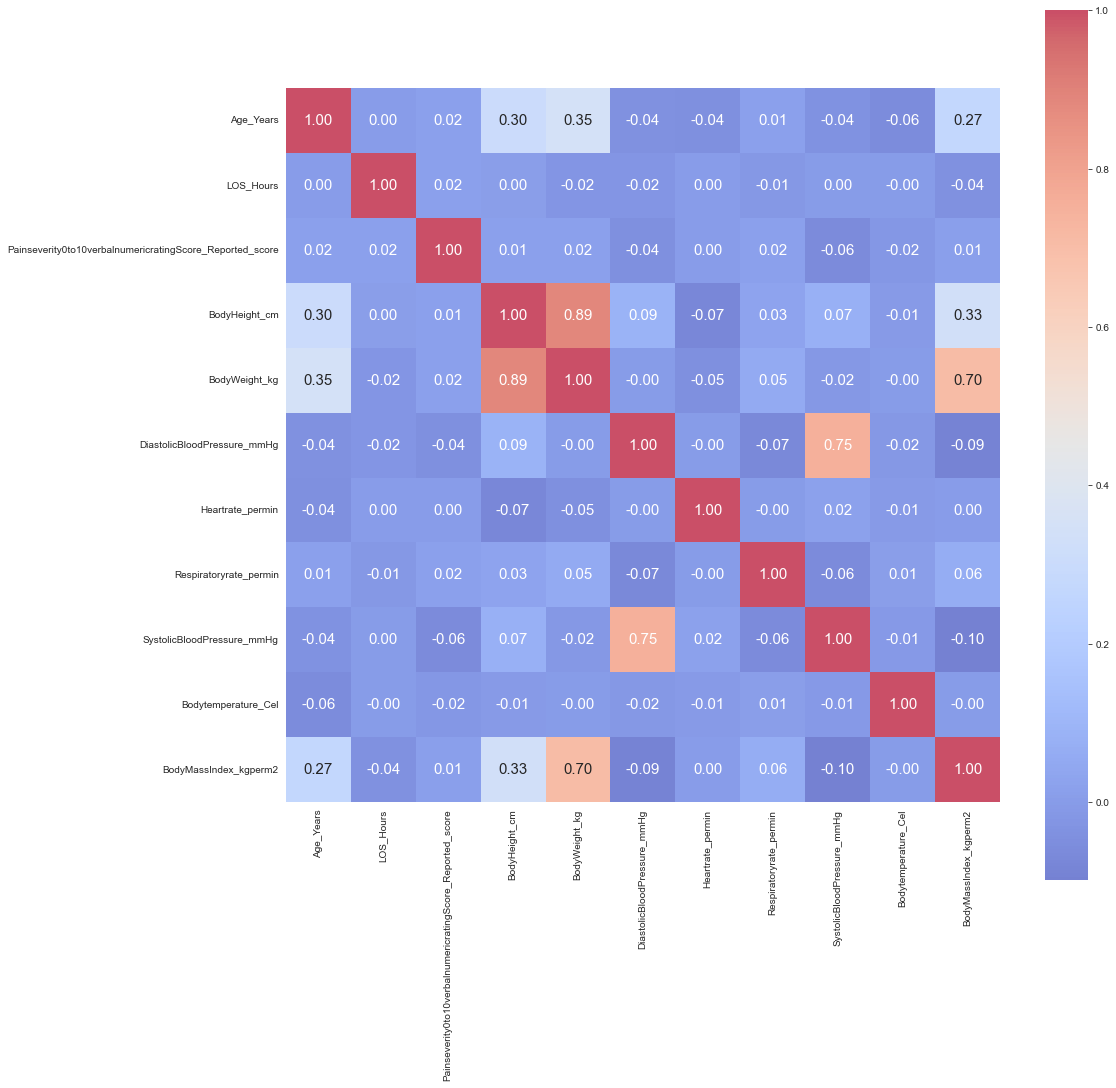

In [37]:
#Heatmaps of correlation
corr = dataframe[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [38]:
#Data cleaning
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Age_Years                                                 1465 non-null   int64  
 1   LOS_Hours                                                 1465 non-null   float64
 2   Painseverity0to10verbalnumericratingScore_Reported_score  1465 non-null   float64
 3   BodyHeight_cm                                             1465 non-null   float64
 4   BodyWeight_kg                                             1465 non-null   float64
 5   DiastolicBloodPressure_mmHg                               1465 non-null   float64
 6   Heartrate_permin                                          1465 non-null   float64
 7   Respiratoryrate_permin                                    1465 non-null   float64
 8   SystolicBloodPress

In [39]:
#Hunting and removing multiple outliers
outlier_indices = outlier_hunt(dataframe[features])
dataframe = dataframe.drop(outlier_indices).reset_index(drop=True)
print(dataframe.shape)

(799, 12)


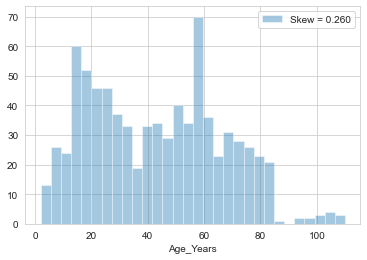

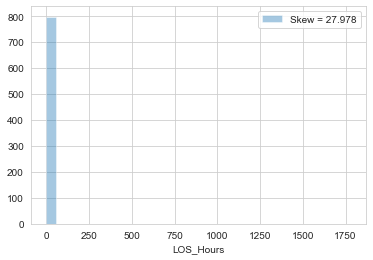

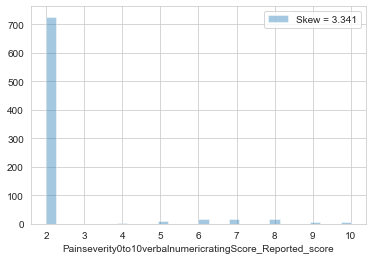

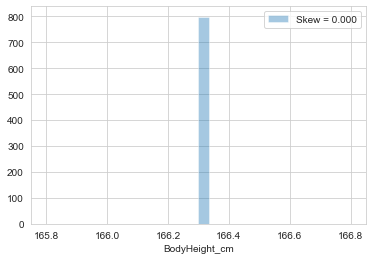

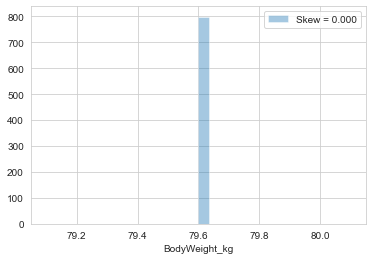

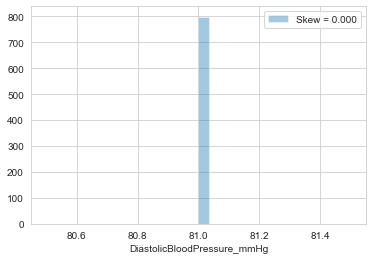

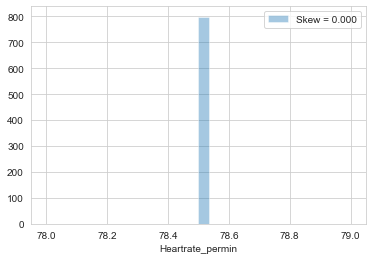

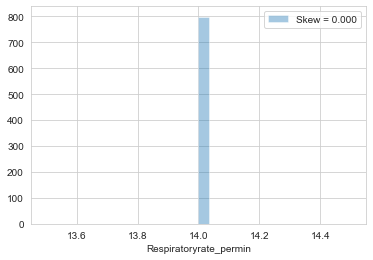

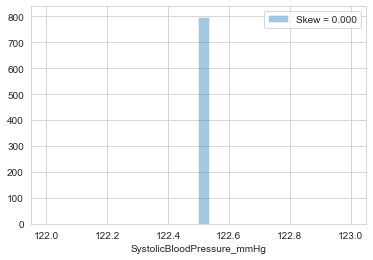

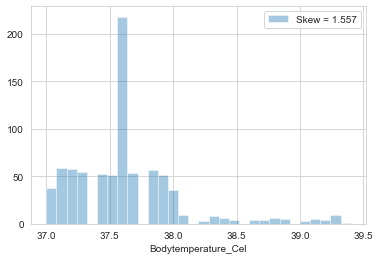

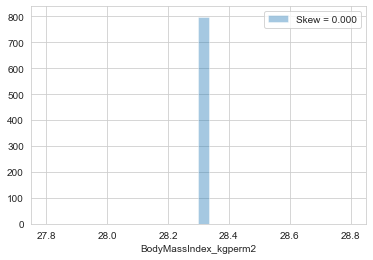

In [40]:
for feat in features:
    skew = dataframe[feat].skew()
    sns.distplot(dataframe[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [41]:
dataframe['CMSDRG'].value_counts()

011    622
385     42
562     31
553     25
157     13
102     11
091     11
393     10
582      7
542      6
291      6
564      3
811      2
374      2
555      2
180      1
913      1
202      1
640      1
375      1
073      1
Name: CMSDRG, dtype: int64

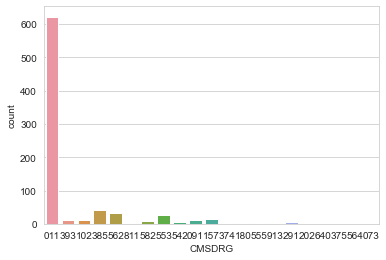

In [42]:
#DRG Distribution
sns.countplot(dataframe['CMSDRG'])
plt.show()

In [43]:
#Split-out validation dataset
# Define X as features and y as lablels
X = dataframe[features] 
y = dataframe['CMSDRG'] 
# set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

[14:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Elapsed time to train XGBoost  0.319 seconds


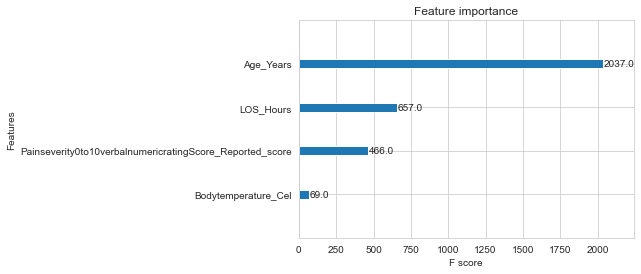

In [44]:
#XGBoost
model_importances = XGBClassifier()
start = time()
model_importances.fit(X_train, y_train)
print('Elapsed time to train XGBoost  %.3f seconds' %(time()-start))
plot_importance(model_importances)
plt.show()

SVC: 82.628968 (+/- 1.092915) performed in 3.288380 seconds
KNN: 86.063988 (+/- 4.367002) performed in 0.101620 seconds
RF: 93.273810 (+/- 2.095046) performed in 0.651928 seconds
Ada: 22.822421 (+/- 31.572777) performed in 1.031591 seconds
ET: 93.427579 (+/- 1.529194) performed in 0.640843 seconds
GB: 92.492560 (+/- 3.102679) performed in 4.065943 seconds
LR: 82.785218 (+/- 1.850586) performed in 0.181419 seconds


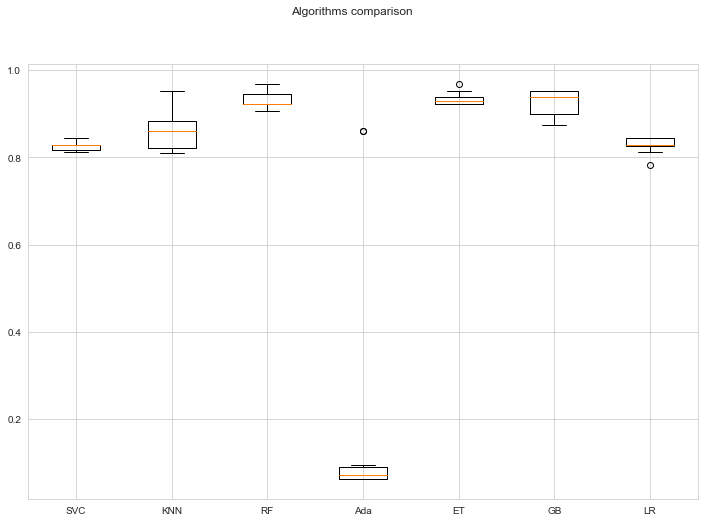

In [45]:
#Compare Models
n_components = 5
pipelines = []
n_estimators = 200

#Algorithms
pipelines.append( ('SVC',
                   Pipeline([
                              ('sc', StandardScaler()),
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ),
                             ('SVC', SVC(random_state=seed))]) ) )

pipelines.append(('KNN',
                  Pipeline([ 
                              ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ),
                            ('KNN', KNeighborsClassifier()) ])))
pipelines.append( ('RF',
                   Pipeline([
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)) ]) ))

pipelines.append( ('Ada',
                   Pipeline([ 
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                    ('Ada', AdaBoostClassifier(random_state=seed,  n_estimators=n_estimators)) ]) ))

pipelines.append( ('ET',
                   Pipeline([
                              ('sc', StandardScaler()),
#                              ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('ET', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators)) ]) ))
pipelines.append( ('GB',
                   Pipeline([ 
                             ('sc', StandardScaler()),
#                             ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('GB', GradientBoostingClassifier(random_state=seed)) ]) ))

pipelines.append( ('LR',
                   Pipeline([
                              ('sc', StandardScaler()),
#                               ('pca', PCA(n_components = n_components, random_state=seed ) ), 
                             ('LR', LogisticRegression(random_state=seed)) ]) ))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds,shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [63]:
#Algorithm Tuning
# Create a pipeline with ExtraTreesClassifier
pipe_et = Pipeline([ 
                      ('scl', StandardScaler()), 
                    ('et',  ExtraTreesClassifier(random_state=seed, n_jobs=-1) )])

# Set the grid parameters
param_grid_et =  [ {
    'et__n_estimators': [100, 200,300,400], # number of estimators
    #'et__criterion': ['gini', 'entropy'],   # Splitting criterion
    'et__max_features':[0.05 , 0.1], # maximum features used at each split
    'et__max_depth': [None, 5], # Max depth of the trees
    'et__min_samples_split': [0.005, 0.01], # mininal samples in leafs
    }]
# Use 10 fold CV
kfold = StratifiedKFold(n_splits=num_folds,shuffle=True, random_state= seed)
grid_et = GridSearchCV(pipe_et, param_grid= param_grid_et, cv=kfold, scoring=scoring, verbose= 1, n_jobs=-1)

#Fit the pipeline
start = time()
grid_et = grid_et.fit(X_train, y_train)
end = time()

print("ET grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(grid_et.best_score_ * 100.0)
print('-------Best params----------')
print(grid_et.best_params_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
ET grid search took 26.817 seconds
-------Best score----------
94.67757936507937
-------Best params----------
{'et__max_depth': None, 'et__max_features': 0.05, 'et__min_samples_split': 0.01, 'et__n_estimators': 100}


In [64]:
#Diagnosis of best algorithm
# Let's define some utility functions to plot the learning & validation curves

def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(train_sizes,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(param_range,test_mean + test_std, test_mean - test_std , color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

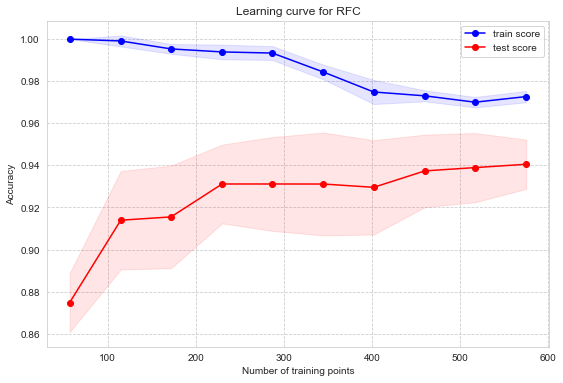

In [65]:
#Plot performance
#Predictions...
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
              estimator= grid_rfc.best_estimator_ , X= X_train, y = y_train, 
                train_sizes=np.arange(0.1,1.1,0.1), cv= 10,  scoring='accuracy', n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RFC')

In [66]:
clf =  ExtraTreesClassifier()
# create pipeline
estimators = [('standardize' , StandardScaler()),('rfecv', RFECV(estimator=clf, scoring='accuracy'))]

In [67]:
# build the pipeline
pipeline = Pipeline(estimators) 

In [68]:
#Run pipeline to get predictions
X = dataframe[features] 
Y = dataframe['CMSDRG'] 
kf = KFold(n_splits=2, shuffle=True, random_state=0)
ypredict = cross_val_predict(pipeline, X, Y, cv=kf)
accuracy = accuracy_score(Y, ypredict)

In [69]:
print(accuracy)

0.9374217772215269


In [70]:
#Convert predcition to dataframes
pred=pd.DataFrame.from_dict(ypredict)

In [71]:
#Combine dataframe and predictions
Dataframe_Prediction=pd.concat([dataframe, pred], axis=1, ignore_index=True)

In [72]:
#Include columne names
Consolidated = Dataframe_Prediction.rename(columns = {0: 'Age_Years',1: 'LOS_Hours',2: 'Painseverity0to10verbalnumericratingScore_Reported_score',3: 'BodyHeight_cm',4: 'BodyWeight_kg',5: 'DiastolicBloodPressure_mmHg',6: 'Heartrate_permin',7: 'Respiratoryrate_permin',8: 'SystolicBloodPressure_mmHg',9: 'Bodytemperature_Cel',10: 'BodyMassIndex_kgperm2',11: 'CMSDRG',12: 'Predicted_CMSDRG'}, inplace = False)

In [73]:
#Key to merge
i="""select x.*,(1*x.CMSDRG) as Key1,(1*x.Predicted_CMSDRG) as Key2 from Consolidated x;"""
pysqldf = lambda i: sqldf(i, globals())
New_Consolidated = pysqldf(i)

In [74]:
#Include DRG names
j="""select distinct x.*, y.MSDRGDESCRIPTION as CMSDRG_DESCRIPTION,z.MSDRGDESCRIPTION as Predicted_CMSDRG_DESCRIPTION
from New_Consolidated x
left join msdrg y on x.Key1=y.MSDRG
left join msdrg z on x.Key2=z.MSDRG;"""
pysqldf = lambda j: sqldf(j, globals())
Final_Results = pysqldf(j)

In [75]:
Final_Results.head(20)

,Age_Years,LOS_Hours,Painseverity0to10verbalnumericratingScore_Reported_score,BodyHeight_cm,BodyWeight_kg,DiastolicBloodPressure_mmHg,Heartrate_permin,Respiratoryrate_permin,SystolicBloodPressure_mmHg,Bodytemperature_Cel,BodyMassIndex_kgperm2,CMSDRG,Predicted_CMSDRG,Key1,Key2,CMSDRG_DESCRIPTION,Predicted_CMSDRG_DESCRIPTION
0,48,0.250000,2.0,166.3,79.6,81.0,78.5,14.0,122.5,37.8,28.3,011,011,11,11,"Tracheostomy for face, mouth and neck","Tracheostomy for face, mouth and neck"
1,44,0.250000,2.0,166.3,79.6,81.0,78.5,14.0,122.5,37.3,28.3,011,011,11,11,"Tracheostomy for face, mouth and neck","Tracheostomy for face, mouth and neck"
2,30,0.500000,2.0,166.3,79.6,81.0,78.5,14.0,122.5,39.3,28.3,011,011,11,11,"Tracheostomy for face, mouth and neck","Tracheostomy for face, mouth and neck"
3,52,0.250000,2.0,166.3,79.6,81.0,78.5,14.0,122.5,37.8,28.3,011,011,11,11,"Tracheostomy for face, mouth and neck","Tracheostomy for face, mouth and neck"
4,12,0.250000,2.0,166.3,79.6,81.0,78.5,14.0,122.5,37.4,28.3,011,011,11,11,"Tracheostomy for face, mouth and neck","Tracheostomy for face, mouth and neck"
5,73,0.250000,2.0,166.3,79.6,81.0,78.5,14.0,122.5,37.6,28.3,011,011,11,11,"Tracheostomy for face, mouth and neck","Tracheostomy for face, mouth and neck"
6,67,0.250000,2.0,166.3,79.6,81.0,78.5,14.0,122.5,37.4,28.3,011,011,11,11,"Tracheostomy for face, mouth and neck","Tracheostomy for face, mouth and neck"
7,65,1.050000,8.0,166.3,79.6,81.0,78.5,14.0,122.5,37.6,28.3,393,393,393,393,Other digestive system diagnoses with mcc,Other digestive system diagnoses with mcc
8,15,0.500000,2.0,166.3,79.6,81.0,78.5,14.0,122.5,37.0,28.3,011,011,11,11,"Tracheostomy for face, mouth and neck","Tracheostomy for face, mouth and neck"
9,12,0.500000,2.0,166.3,79.6,81.0,78.5,14.0,122.5,37.4,28.3,011,011,11,11,"Tracheostomy for face, mouth and neck","Tracheostomy for face, mouth and neck"


In [76]:
#Export Final_Results to csv
Final_Results.to_csv(r'C:\Users\olajideajayi\OneDrive - Microsoft\Desktop\WIP\1 ShellyA Pipeline\Tampa General Hospital\Final_Results.csv', index = False)